In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import lifelines as lf
import pingouin as pg

/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.6, the latest is 0.5.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/opt/miniconda3/envs/databs/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.0, the latest is 0.2.1.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## Survival

In [2]:
MK_surv = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/MK_lifelines.csv')

In [3]:
MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
HE        MK-801     1.0                9
          Saline     1.0                8
KO        MK-801     0.5               80
                     1.0               24
          Saline     1.0               76
WT        MK-801     0.5               42
                     1.0               30
          Saline     1.0               47
Name: ID, dtype: int64

In [4]:
km_fit = lf.KaplanMeierFitter()

Text(1.03, 0.569, '***')

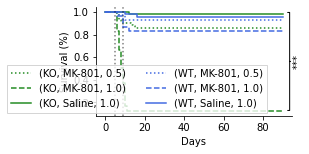

In [44]:
surv_all = plt.figure(figsize=(3.5,2))
ax=plt.subplot()
colors = {'KO': 'forestgreen', 'WT': 'royalblue'}
st = {'Saline_1.0': 'solid', 'MK-801_1.0': 'dashed', 'MK-801_0.5': 'dotted'}
for name, grouped_df in MK_surv.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)']):
    if 'HE' not in name:
        km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
        km_fit.plot(ax=ax, ci_show=False, color = colors[name[0]], linestyle= st[name[1]+'_'+str(name[2])])
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=False, ncol=2, loc = 7, bbox_to_anchor = (.9, .25))
plt.axvline(5, ls=':', color = 'k', alpha = .5)
plt.axvline(9, ls=':', color = 'k', alpha = .5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.annotate('***', xy=(0.99, .5), xytext=(1.03, 0.569), fontsize = 10, xycoords='axes fraction', ha='center',
                va='top', rotation = 90, arrowprops=dict(arrowstyle='-[, widthB=4.9, lengthB=.2', lw=1, color='k'))

In [45]:
surv_all.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_all_final.svg')

In [6]:
MK_surv['Group'] = MK_surv['Genotype']+'_'+MK_surv['Treatment']+'_'+MK_surv['Dosage (mg/kg)'].astype(str)

In [46]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_surv[MK_surv['Genotype']!='HE']['Duration'], event_observed = MK_surv[MK_surv['Genotype']!='HE']['Event'], groups = MK_surv[MK_surv['Genotype']!='HE']['Group'])

sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [48]:
logrank_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_all_logrank_final.csv')

In [47]:
logrank_df

test_statistic             p  Bonferroni adj
KO_MK-801_0.5 KO_MK-801_1.0       61.651567  4.099407e-15         0.00000
              KO_Saline_1.0        8.469045  3.612411e-03         0.05419
              WT_MK-801_0.5        1.200975  2.731269e-01         1.00000
              WT_MK-801_1.0        0.125862  7.227613e-01         1.00000
              WT_Saline_1.0        2.950945  8.582735e-02         1.00000
KO_MK-801_1.0 KO_Saline_1.0      109.882857  1.039560e-25         0.00000
              WT_MK-801_0.5       52.436587  4.443676e-13         0.00000
              WT_MK-801_1.0       30.731174  2.963652e-08         0.00000
              WT_Saline_1.0       66.564519  3.386267e-16         0.00000
KO_Saline_1.0 WT_MK-801_0.5        2.844136  9.170787e-02         1.00000
              WT_MK-801_1.0        9.779738  1.764454e-03         0.02647
              WT_Saline_1.0        1.048300  3.058989e-01         1.00000
WT_MK-801_0.5 WT_MK-801_1.0        1.623359  2.026241e-01         1.00000
              WT_Saline_1.0        0.367574  5.443296e-01         1.00000
WT_MK-801_1.0 WT_Saline_1.0        3.555435  5.935075e-02         0.89026

In [49]:
MK_1mg = MK_surv[MK_surv['Dosage (mg/kg)'] == 1]

Text(0.5, 1.0, 'Dosage: 1mg/kg')

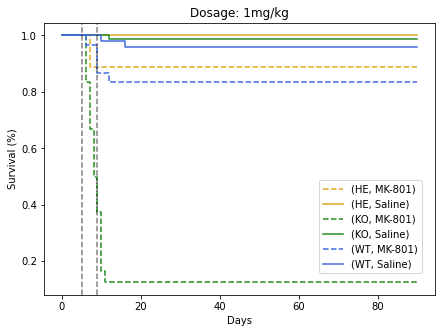

In [50]:
surv_1mg = plt.figure(figsize = (7,5))
ax=plt.subplot()
colors = {'HE': 'goldenrod', 'KO': 'forestgreen', 'WT': 'royalblue'}
st = {'Saline': 'solid', 'MK-801': 'dashed'}
for name, grouped_df in MK_1mg.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False, color = colors[name[0]], linestyle= st[name[1]])
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=1, loc = 7, bbox_to_anchor = (.98, .25))
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.title('Dosage: 1mg/kg')

In [51]:
surv_1mg.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_1mg.svg')

In [52]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_1mg['Duration'], event_observed = MK_1mg['Event'], groups = MK_1mg['Group'])
sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [53]:
logrank_df

test_statistic             p  Bonferroni adj
HE_MK-801_1.0 HE_Saline_1.0        0.888889  3.457786e-01         1.00000
              KO_MK-801_1.0       12.298642  4.532879e-04         0.00680
              KO_Saline_1.0        3.529152  6.029863e-02         0.90448
              WT_MK-801_1.0        0.121363  7.275605e-01         1.00000
              WT_Saline_1.0        0.772660  3.793955e-01         1.00000
HE_Saline_1.0 KO_MK-801_1.0       14.893160  1.137748e-04         0.00171
              KO_Saline_1.0        0.105263  7.456028e-01         1.00000
              WT_MK-801_1.0        1.449685  2.285785e-01         1.00000
              WT_Saline_1.0        0.344125  5.574578e-01         1.00000
KO_MK-801_1.0 KO_Saline_1.0      109.882857  1.039560e-25         0.00000
              WT_MK-801_1.0       30.731174  2.963652e-08         0.00000
              WT_Saline_1.0       66.564519  3.386267e-16         0.00000
KO_Saline_1.0 WT_MK-801_1.0        9.779738  1.764454e-03         0.02647
              WT_Saline_1.0        1.048300  3.058989e-01         1.00000
WT_MK-801_1.0 WT_Saline_1.0        3.555435  5.935075e-02         0.89026

In [55]:
logrank_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_1mg_logrank.csv')

In [56]:
MK_05mg = MK_surv.copy()

In [57]:
MK_05mg.loc[MK_05mg['Treatment']=='Saline', 'Dosage (mg/kg)']  = 0.5

In [58]:
MK_05mg

ID  Litter Genotype Treatment  Dosage (mg/kg)  Sex  Duration  \
0    KO_4.1_4  KO_4.1       KO    Saline             0.5  Fem        90   
1    KO_4.1_5  KO_4.1       KO    Saline             0.5  Fem        90   
2    KO_4.1_1  KO_4.1       KO    MK-801             1.0  Fem        90   
3    KO_4.1_2  KO_4.1       KO    MK-801             1.0  NaN         6   
4    KO_4.1_3  KO_4.1       KO    MK-801             1.0  NaN         6   
..        ...     ...      ...       ...             ...  ...       ...   
311  HE_3.3_4  HE_3.3       HE    Saline             0.5  Fem        70   
312  HE_3.3_5  HE_3.3       HE    Saline             0.5  Fem        70   
313  WT_6.8_3  WT_6.8       WT    MK-801             1.0  NaN        30   
314  WT_9.9_1  WT_9.9       WT    MK-801             1.0  NaN        31   
315  WT_8.7_1  WT_8.7       WT    MK-801             1.0  NaN        26   

     Event          Group  
0        0  KO_Saline_1.0  
1        0  KO_Saline_1.0  
2        0  KO_MK-801_1.0  
3        1  KO_MK-801_1.0  
4        1  KO_MK-801_1.0  
..     ...            ...  
311      0  HE_Saline_1.0  
312      0  HE_Saline_1.0  
313      0  WT_MK-801_1.0  
314      0  WT_MK-801_1.0  
315      0  WT_MK-801_1.0  

[316 rows x 9 columns]

In [59]:
MK_05 = MK_05mg[(MK_05mg['Dosage (mg/kg)'] == 0.5) & (MK_05mg['Genotype'] != 'HE')]

Text(0.5, 1.0, 'Dosage: 0.5mg/kg')

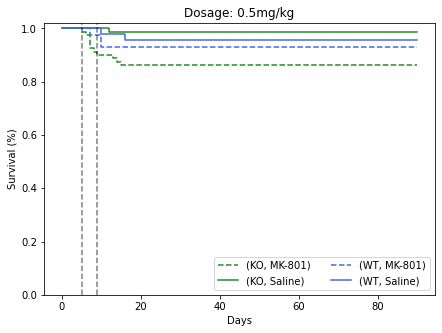

In [61]:
surv_05 = plt.figure(figsize = (7,5))
ax=plt.subplot()
colors = {'HE': 'goldenrod', 'KO': 'forestgreen', 'WT': 'royalblue'}
st = {'Saline': 'solid', 'MK-801': 'dashed'}
for name, grouped_df in MK_05.groupby(['Genotype', 'Treatment']):
    km_fit.fit(grouped_df["Duration"], grouped_df["Event"], label=name)
    km_fit.plot(ax=ax, ci_show=False, color = colors[name[0]], linestyle = st[name[1]])
plt.ylabel('Survival (%)')
plt.xlabel('Days')
ax.legend(fancybox=True, ncol=2)
plt.axvline(5, ls='--', color = 'k', alpha=.5)
plt.axvline(9, ls='--', color = 'k', alpha=.5)
plt.ylim(0, 1.02)
plt.title('Dosage: 0.5mg/kg')

In [63]:
surv_05.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_05mg.svg')

In [64]:
plr_test = lf.statistics.pairwise_logrank_test(event_durations = MK_05['Duration'], event_observed = MK_05['Event'], groups = MK_05['Group'])
sig, p_adj = pg.multicomp(plr_test.summary['p'].values, method = 'bonf')

logrank_df = plr_test.summary

logrank_df['Bonferroni adj'] = p_adj.round(5)

In [65]:
logrank_df

test_statistic         p  Bonferroni adj
KO_MK-801_0.5 KO_Saline_1.0        8.469045  0.003612         0.02167
              WT_MK-801_0.5        1.200975  0.273127         1.00000
              WT_Saline_1.0        2.950945  0.085827         0.51496
KO_Saline_1.0 WT_MK-801_0.5        2.844136  0.091708         0.55025
              WT_Saline_1.0        1.048300  0.305899         1.00000
WT_MK-801_0.5 WT_Saline_1.0        0.367574  0.544330         1.00000

In [66]:
logrank_df.to_csv('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Survival_05mg_logrank.csv')

## Growth

In [49]:
MK_grow = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Pesos(3).csv')

In [50]:
MK_grow.dropna(how='any', inplace = True)

In [51]:
MK_grow.drop(MK_grow.tail(1).index, inplace = True)

In [52]:
MK_grow.groupby(['Genotype', 'Treatment', 'Dosage (mg/kg)'])['ID'].count()

Genotype  Treatment  Dosage (mg/kg)
HE        MK-801     1.0                6
          Saline     1.0                6
KO        MK-801     0.5               64
                     1.0                3
          Saline     1.0               68
WT        MK-801     0.5               26
                     1.0               22
          Saline     1.0               36
Name: ID, dtype: int64

In [53]:
MK_grow.columns

Index(['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '33', '34', '35', '40', '45', '50', '55', '60', '65',
       '70', '75', '80', '85', '90'],
      dtype='object')

In [54]:
mk_g= MK_grow.melt(id_vars=['ID', 'Litter', 'Genotype', 'Treatment', 'Dosage (mg/kg)', 'Sex'], var_name='Day', value_name = 'Weight')

In [55]:
mk_g['Day'] = mk_g['Day'].astype('float')

In [64]:
mk_g['Group'] = mk_g['Genotype']+'_'+mk_g['Treatment']

In [66]:
mk_g['Tx'] = mk_g['Treatment'] + '_' + mk_g['Dosage (mg/kg)'].astype(str)

Text(0, 0.5, 'Weight (g)')

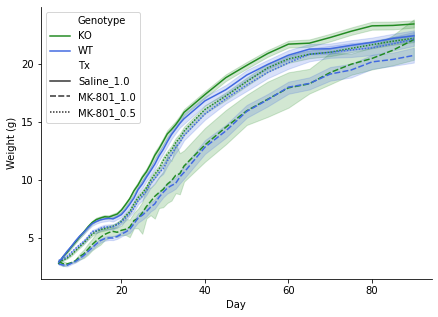

In [68]:
wt_all_curv = plt.figure(figsize=(7,5))
sns.lineplot(data = mk_g[mk_g['Genotype']!= 'HE'], x ='Day', y='Weight', hue='Genotype', style='Tx', palette=['forestgreen', 'royalblue'], legend= 'brief', ci = 68)
sns.despine()
plt.ylabel('Weight (g)')


In [69]:
wt_all_curv.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_all_curv.svg')

Text(0, 0.5, 'Weight (g)')

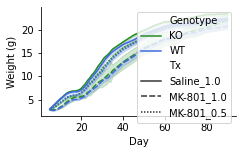

In [70]:
wt_all_paper = plt.figure(figsize=(3.5,2))
sns.lineplot(data = mk_g[mk_g['Genotype']!= 'HE'], x ='Day', y='Weight', hue='Genotype', style='Tx', palette=['forestgreen', 'royalblue'], legend= 'brief', ci = 68)
sns.despine()
plt.ylabel('Weight (g)')


In [71]:
wt_all_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_all_paper.svg')

Text(0, 3, '***')

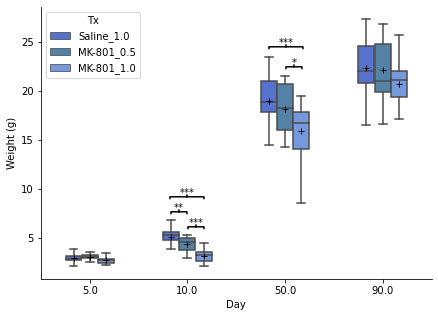

In [197]:
wt_grwt_fig = plt.figure(figsize=(7,5))
sns.boxplot(data = mk_g[(mk_g['Genotype']== 'WT') & (mk_g['Day'].isin([5, 10, 50, 90]))], x ='Day', y='Weight', hue='Tx', hue_order = ['Saline_1.0', 'MK-801_0.5', 'MK-801_1.0'], palette=['royalblue', 'steelblue', 'cornflowerblue'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"}, showfliers = False)
sns.despine()
#plt.title('Weight 1mg/kg')
plt.ylabel('Weight (g)')

plt.annotate(s='***', xy=(155, 50), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.8, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(138, 65), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.8, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(146, 80), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)

plt.annotate(s='*', xy=(253, 210), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.8, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(245, 230), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


In [198]:
wt_grwt_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/wt_grwt_fig.svg')

In [184]:
wt_grwt = mk_g[(mk_g['Genotype']=='WT') & (mk_g['Day'].isin([5, 10, 50, 90]))].copy()


In [148]:
wght_1mg['Group_w'] = wght_1mg['Group']+'_'+ wght_1mg['Day'].astype(str)

In [149]:
pg.normality(data = wght_1mg, dv = 'Weight', group = 'Group_w')

W      pval  normal
KO_Saline_5.0   0.963031  0.041458   False
WT_Saline_5.0   0.980373  0.757857    True
WT_MK-801_5.0   0.886071  0.015807   False
KO_Saline_10.0  0.977272  0.248938    True
WT_Saline_10.0  0.930986  0.026815   False
WT_MK-801_10.0  0.975404  0.831263    True
KO_Saline_30.0  0.988964  0.813428    True
WT_Saline_30.0  0.954497  0.144832    True
WT_MK-801_30.0  0.927289  0.107735    True
KO_Saline_60.0  0.982948  0.478436    True
WT_Saline_60.0  0.973443  0.526765    True
WT_MK-801_60.0  0.919604  0.074598    True

In [150]:
pg.homoscedasticity(data = wght_1mg, dv = 'Weight', group = 'Group_w')

W          pval  equal_var
levene  19.292381  2.655658e-32      False

In [185]:
pg.mixed_anova(data = wt_grwt, dv = 'Weight', within = 'Day', between = 'Tx', subject = 'ID', correction = True)


Source            SS  DF1  DF2           MS            F  \
0           Tx    165.743253    2   81    82.871626     9.346242   
1          Day  22855.860760    3  243  7618.620253  3249.711928   
2  Interaction     62.258393    6  243    10.376399     4.426039   

           p-unc     p-GG-corr       np2       eps sphericity   W-spher  \
0   2.227488e-04           NaN  0.187501       NaN        NaN       NaN   
1  9.626170e-196  1.402195e-99  0.975681  0.502995      False  0.121001   
2   2.868809e-04           NaN  0.098518       NaN        NaN       NaN   

        p-spher  
0           NaN  
1  2.165313e-35  
2           NaN

In [186]:
pg.pairwise_ttests(data = wt_grwt, dv = 'Weight', within = 'Day', between = 'Tx', subject = 'ID', padjust = 'holm')


Contrast Day           A           B Paired  Parametric          T  \
0        Day   -           5          10   True        True -14.254445   
1        Day   -           5          50   True        True -51.099364   
2        Day   -           5          90   True        True -61.039529   
3        Day   -          10          50   True        True -56.160078   
4        Day   -          10          90   True        True -60.835726   
5        Day   -          50          90   True        True -23.044644   
6         Tx   -  Saline_1.0  MK-801_1.0  False        True   4.282583   
7         Tx   -  Saline_1.0  MK-801_0.5  False        True   1.145043   
8         Tx   -  MK-801_1.0  MK-801_0.5  False        True  -2.993299   
9   Day * Tx   5  Saline_1.0  MK-801_1.0  False        True   1.459059   
10  Day * Tx   5  Saline_1.0  MK-801_0.5  False        True  -1.363636   
11  Day * Tx   5  MK-801_1.0  MK-801_0.5  False        True  -2.721831   
12  Day * Tx  10  Saline_1.0  MK-801_1.0  False        True  10.005532   
13  Day * Tx  10  Saline_1.0  MK-801_0.5  False        True   3.746785   
14  Day * Tx  10  MK-801_1.0  MK-801_0.5  False        True  -6.238882   
15  Day * Tx  50  Saline_1.0  MK-801_1.0  False        True   4.418919   
16  Day * Tx  50  Saline_1.0  MK-801_0.5  False        True   1.339019   
17  Day * Tx  50  MK-801_1.0  MK-801_0.5  False        True  -3.055905   
18  Day * Tx  90  Saline_1.0  MK-801_1.0  False        True   2.131971   
19  Day * Tx  90  Saline_1.0  MK-801_0.5  False        True   0.364730   
20  Day * Tx  90  MK-801_1.0  MK-801_0.5  False        True  -1.575968   

          dof       Tail         p-unc        p-corr p-adjust       BF10  \
0   83.000000  two-sided  5.058683e-24  5.058683e-24     holm  8.113e+20   
1   83.000000  two-sided  1.686539e-64  5.059616e-64     holm  5.911e+60   
2   83.000000  two-sided  9.653423e-71  5.792054e-70     holm  8.606e+66   
3   83.000000  two-sided  8.273170e-68  3.309268e-67     holm  1.094e+64   
4   83.000000  two-sided  1.266579e-70  6.332895e-70     holm  6.581e+66   
5   83.000000  two-sided  7.997468e-38  1.599494e-37     holm  2.917e+34   
6   44.872302  two-sided  9.610954e-05  2.883286e-04     holm    288.123   
7   54.320205  two-sided  2.572116e-01  2.572116e-01     holm      0.453   
8   44.700085  two-sided  4.483396e-03  8.966792e-03     holm      9.252   
9   47.035792  two-sided  1.511952e-01  6.100255e-01     holm      0.656   
10  59.116699  two-sided  1.778524e-01  6.100255e-01     holm       0.57   
11  42.079912  two-sided  9.404235e-03  6.582964e-02     holm      5.218   
12  55.104480  two-sided  5.357550e-14  6.429060e-13     holm  9.945e+10   
13  59.015092  two-sided  4.092686e-04  3.683418e-03     holm     66.405   
14  45.999973  two-sided  1.268393e-07  1.395233e-06     holm   8.44e+04   
15  43.235454  two-sided  6.558645e-05  6.558645e-04     holm     431.91   
16  55.305134  two-sided  1.860422e-01  6.100255e-01     holm      0.554   
17  43.319788  two-sided  3.833109e-03  3.066487e-02     holm     10.622   
18  41.254351  two-sided  3.901039e-02  2.340623e-01     holm      1.737   
19  49.452904  two-sided  7.168683e-01  7.168683e-01     holm      0.277   
20  45.213963  two-sided  1.220051e-01  6.100255e-01     holm      0.784   

      hedges  
0  -1.808443  
1  -7.409318  
2  -8.816747  
3  -6.299740  
4  -7.714557  
5  -1.345878  
6   1.140601  
7   0.290555  
8  -0.852863  
9   0.382733  
10 -0.335050  
11 -0.784593  
12  2.446660  
13  0.921593  
14 -1.752157  
15  1.190571  
16  0.337991  
17 -0.876575  
18  0.582636  
19  0.094747  
20 -0.447555

Text(0, 2, '***')

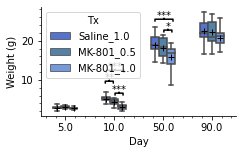

In [220]:
wt_grwt_paper = plt.figure(figsize=(3.5,2))
sns.boxplot(data = mk_g[(mk_g['Genotype']== 'WT') & (mk_g['Day'].isin([5, 10, 50, 90]))], x ='Day', y='Weight', hue='Tx', hue_order = ['Saline_1.0', 'MK-801_0.5', 'MK-801_1.0'], palette=['royalblue', 'steelblue', 'cornflowerblue'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"}, showfliers = False)
sns.despine()
#plt.title('Weight 1mg/kg')
plt.ylabel('Weight (g)')
plt.minorticks_on()
plt.annotate(s='***', xy=(.40, .19), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.4, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(.35, .3), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.4, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(.38, .4), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.9, lengthB=.2', lw=1.5, color='k'), fontsize = 10)

plt.annotate(s='*', xy=(.65, .77), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.4, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(.63, .87), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.9, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


In [221]:
wt_grwt_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/wt_grwt_paper.svg')

In [209]:
mk_g05 = mk_g.copy()
mk_g05['Dosage (mg/kg)'][mk_g05['Treatment'] == 'Saline'] = 0.5

<ipython-input-209-f16a1568e0d7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mk_g05['Dosage (mg/kg)'][mk_g05['Treatment'] == 'Saline'] = 0.5


Text(0, 0.5, 'Weight (g)')

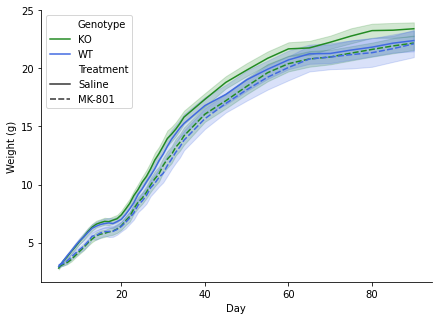

In [210]:
wt_05mg_curv = plt.figure(figsize=(7,5))
sns.lineplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE')], x ='Day', y='Weight', hue='Genotype', style='Treatment', palette=['forestgreen', 'royalblue'])
sns.despine()
plt.ylabel('Weight (g)')

In [226]:
wt_05mg_curv.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_05mg_curv.svg')

Text(0, 3, '*')

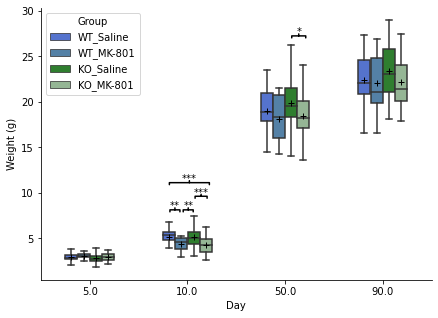

In [262]:
wt_05mg_fig = plt.figure(figsize=(7,5))
sns.boxplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 50, 90]))], x ='Day', y='Weight', hue='Group', hue_order =['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801'] , palette=['royalblue', 'steelblue','forestgreen', 'darkseagreen'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"}, showfliers = False)
sns.despine()
#plt.title('Weight 0.5 mg/kg')
plt.ylabel('Weight (g)')

plt.annotate(s='***', xy=(0.41, 0.3), xycoords='axes fraction', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.6, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(0.38, 0.35), xycoords='axes fraction', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(0.343, 0.25), xycoords='axes fraction', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.5, lengthB=.2', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(0.377, 0.25), xycoords='axes fraction', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.5, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


plt.annotate(s='*', xy=(0.66, 0.89), xycoords='axes fraction', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.7, lengthB=.2', lw=1.5, color='k'), fontsize = 10)


In [263]:
wt_05mg_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/Wt_05mg_box.svg')

In [222]:
wght_05mg = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 50, 90]))]

In [223]:
wght_05mg['Group_w'] = wght_05mg['Group']+'_'+ wght_05mg['Day'].astype(str)

<ipython-input-223-cd3f881b2738>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wght_05mg['Group_w'] = wght_05mg['Group']+'_'+ wght_05mg['Day'].astype(str)


In [224]:
pg.mixed_anova(data = wght_05mg, dv = 'Weight', within = 'Day', between = 'Group', subject = 'ID', correction = True)

Source            SS  DF1  DF2            MS            F     p-unc  \
0        Group    108.387825    3  190     36.129275     4.365820  0.005335   
1          Day  57654.954084    3  570  19218.318028  8775.140145  0.000000   
2  Interaction     77.021257    9  570      8.557917     3.907570  0.000078   

       p-GG-corr       np2      eps sphericity   W-spher       p-spher  
0            NaN  0.064489      NaN        NaN       NaN           NaN  
1  6.529136e-230  0.978807  0.47879      False  0.120635  2.063638e-85  
2            NaN  0.058113      NaN        NaN       NaN           NaN

In [225]:
pg.pairwise_ttests(data = wght_05mg, dv = 'Weight', within = 'Day', between = 'Group', subject = 'ID', marginal = True, padjust = 'holm')

Contrast Day          A          B Paired  Parametric           T  \
0           Day   -          5         10   True        True  -30.663763   
1           Day   -          5         50   True        True  -89.004062   
2           Day   -          5         90   True        True -102.956251   
3           Day   -         10         50   True        True  -88.523091   
4           Day   -         10         90   True        True  -98.490307   
5           Day   -         50         90   True        True  -36.959310   
6         Group   -  KO_Saline  WT_Saline  False        True    1.390882   
7         Group   -  KO_Saline  KO_MK-801  False        True    3.349582   
8         Group   -  KO_Saline  WT_MK-801  False        True    2.553713   
9         Group   -  WT_Saline  KO_MK-801  False        True    1.323706   
10        Group   -  WT_Saline  WT_MK-801  False        True    1.145043   
11        Group   -  KO_MK-801  WT_MK-801  False        True    0.088348   
12  Day * Group   5  KO_Saline  WT_Saline  False        True   -1.352602   
13  Day * Group   5  KO_Saline  KO_MK-801  False        True   -2.245058   
14  Day * Group   5  KO_Saline  WT_MK-801  False        True   -2.851450   
15  Day * Group   5  WT_Saline  KO_MK-801  False        True   -0.575383   
16  Day * Group   5  WT_Saline  WT_MK-801  False        True   -1.363636   
17  Day * Group   5  KO_MK-801  WT_MK-801  False        True   -1.004662   
18  Day * Group  10  KO_Saline  WT_Saline  False        True   -0.292888   
19  Day * Group  10  KO_Saline  KO_MK-801  False        True    5.157674   
20  Day * Group  10  KO_Saline  WT_MK-801  False        True    3.747043   
21  Day * Group  10  WT_Saline  KO_MK-801  False        True    4.995657   
22  Day * Group  10  WT_Saline  WT_MK-801  False        True    3.746785   
23  Day * Group  10  KO_MK-801  WT_MK-801  False        True   -0.890807   
24  Day * Group  50  KO_Saline  WT_Saline  False        True    1.632635   
25  Day * Group  50  KO_Saline  KO_MK-801  False        True    3.115966   
26  Day * Group  50  KO_Saline  WT_MK-801  False        True    3.037564   
27  Day * Group  50  WT_Saline  KO_MK-801  False        True    1.024725   
28  Day * Group  50  WT_Saline  WT_MK-801  False        True    1.339019   
29  Day * Group  50  KO_MK-801  WT_MK-801  False        True    0.499181   
30  Day * Group  90  KO_Saline  WT_Saline  False        True    1.826987   
31  Day * Group  90  KO_Saline  KO_MK-801  False        True    2.709813   
32  Day * Group  90  KO_Saline  WT_MK-801  False        True    1.872298   
33  Day * Group  90  WT_Saline  KO_MK-801  False        True    0.377931   
34  Day * Group  90  WT_Saline  WT_MK-801  False        True    0.364730   
35  Day * Group  90  KO_MK-801  WT_MK-801  False        True    0.097589   

           dof       Tail          p-unc         p-corr p-adjust        BF10  \
0   193.000000  two-sided   4.091918e-76   4.091918e-76     holm    2.84e+72   
1   193.000000  two-sided  1.188884e-158  4.755537e-158     holm  3.119e+154   
2   193.000000  two-sided  1.320009e-170  7.920051e-170     holm  2.421e+166   
3   193.000000  two-sided  3.300005e-158  9.900016e-158     holm   1.13e+154   
4   193.000000  two-sided  5.868369e-167  2.934185e-166     holm  5.697e+162   
5   193.000000  two-sided   1.713427e-89   3.426855e-89     holm   5.488e+85   
6    66.345991  two-sided   1.689085e-01   6.756341e-01     holm       0.507   
7   128.279475  two-sided   1.063076e-03   6.378459e-03     holm      26.916   
8    42.431020  two-sided   1.433703e-02   7.168515e-02     holm       3.804   
9    70.861915  two-sided   1.898553e-01   6.756341e-01     holm       0.472   
10   54.320205  two-sided   2.572116e-01   6.756341e-01     holm       0.453   
11   45.546626  two-sided   9.299876e-01   9.299876e-01     holm       0.241   
12   82.767373  two-sided   1.798667e-01   1.000000e+00     holm       0.484   
13  125.590580  two-sided   2.651370e-02   4.242192e-01     holm       1.8

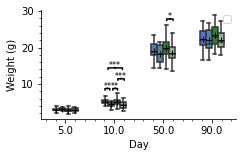

In [279]:
all_grwt_paper = plt.figure(figsize=(3.5,2))
sns.boxplot(data = mk_g05[(mk_g05['Dosage (mg/kg)']==0.5) & (mk_g05['Genotype']!= 'HE') & (mk_g['Day'].isin([5, 10, 50, 90]))], x ='Day', y='Weight', hue='Group', hue_order =['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801'] , palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], width = 0.5, showmeans = True, meanprops={"marker":"+", "markeredgecolor":"k"}, showfliers = False)
sns.despine()
#plt.title('Weight 0.5 mg/kg')
plt.ylabel('Weight (g)')
plt.minorticks_on()
plt.annotate(s='***', xy=(0.41, 0.35), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.4, lengthB=.2', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='***', xy=(0.38, 0.45), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=0.9, lengthB=.2', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='**', xy=(0.34, 0.26), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.3, lengthB=.2', lw=1.5, color='k'), fontsize = 8)
plt.annotate(s='**', xy=(0.38, 0.26), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.3, lengthB=.2', lw=1.5, color='k'), fontsize = 8)


plt.annotate(s='*', xy=(0.66, 0.9), xycoords='axes fraction', xytext=(0, 2), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=.4, lengthB=.2', lw=1.5, color='k'), fontsize = 8)
plt.legend('')

In [281]:
all_grwt_paper.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/all_grwt_paper.svg')

## Nesting

In [232]:
nest_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Nesting_Data_Final.csv')

In [233]:
nest_r['Tx'].unique()

array(['MK-801', 'Saline'], dtype=object)

In [255]:
nest_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             22
                  1.0              3
          Saline  1.0             32
WT        MK-801  0.5             19
                  1.0             21
          Saline  1.0             26
Name: Sub, dtype: int64

In [235]:
nest_r['Group'] = nest_r['Genotype']+'_'+nest_r['Tx']+'_'+nest_r['Dose (mg/Kg)'].astype(str)

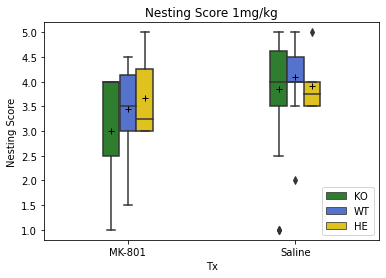

In [284]:
sns.boxplot(data=nest_r[nest_r['Dose (mg/Kg)']==1], x='Tx', y='Nesting Score', hue='Genotype', hue_order = ['KO', 'WT', 'HE'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['forestgreen', 'royalblue', 'gold'])
plt.title('Nesting Score 1mg/kg')
plt.legend(loc=4)


### Nesting: Effects of MK-801 on WT mice

In [366]:
nest_r[nest_r['Genotype'] == 'WT']['Group'].unique()

array(['WT_MK-801_1.0', 'WT_Saline_1.0', 'WT_MK-801_0.5'], dtype=object)

Text(0, 4, '**')

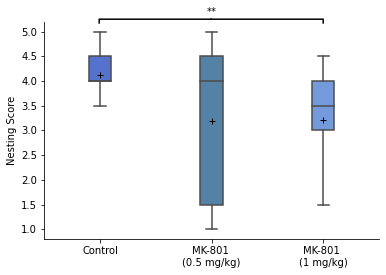

In [708]:
wt_nest_fig = plt.figure(figsize=(6,4))
ax = plt.subplot()
sns.boxplot(data=nest_r[nest_r['Genotype']=='WT'], x='Group', y='Nesting Score', hue='Group', order = ['WT_Saline_1.0', 'WT_MK-801_0.5', 'WT_MK-801_1.0'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.2, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = False, ax = ax, dodge = False)
sns.despine()
labels = ['Control', 'MK-801 \n(0.5 mg/kg)', 'MK-801 \n(1 mg/kg)']
ax.set_xticklabels(labels)
plt.xlabel('')
plt.legend([],[], frameon=False)
plt.annotate(s='**', xy=(167, 220), xycoords='axes points', xytext=(0, 4), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=.4', lw=1.5, color='k'), fontsize = 10)


In [709]:
wt_nest_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/wt_nesting_box.svg')

In [258]:
out = pg.madmedianrule(nest_r[(nest_r['Genotype']=='WT')&(nest_r['Group']=='WT_Saline_1.0')]['Nesting Score'])
idx = nest_r[(nest_r['Genotype']=='WT')&(nest_r['Group']=='WT_Saline_1.0')]['Nesting Score'].index.values

nest_r.drop(index = idx[out], inplace = True)

In [262]:
pg.normality(data = nest_r[nest_r['Genotype'] == 'WT'], dv = 'Nesting Score', group = 'Group')

W      pval  normal
WT_MK-801_1.0  0.778838  0.000317   False
WT_Saline_1.0  0.896246  0.015213   False
WT_MK-801_0.5  0.810629  0.001638   False

### Stats

In [263]:
pg.kruskal(data = nest_r[nest_r['Genotype'] == 'WT'], dv = 'Nesting Score', between = 'Group')

Source  ddof1         H     p-unc
Kruskal  Group      2  8.565959  0.013801

In [298]:
wt_nest_multicomp = {'Group A': ['WT_Saline_1.0', 'WT_Saline_1.0', 'WT_MK-801_1.0'], 'Group B': ['WT_MK-801_0.5', 'WT_MK-801_1.0', 'WT_MK-801_0.5'], 'MWU-U' : [], 'MWU-p' : []}

In [299]:
for ii in range(0, 3):
    group_A = nest_r[nest_r['Group'] == wt_nest_multicomp['Group A'][ii]]['Nesting Score']
    group_B = nest_r[nest_r['Group'] == wt_nest_multicomp['Group B'][ii]]['Nesting Score']
    mwu_p = pg.mwu(group_A, group_B, tail = 'one-sided')
    wt_nest_multicomp['MWU-U'].append(mwu_p['U-val'].values.item())
    wt_nest_multicomp['MWU-p'].append(mwu_p['p-val'].values.item())

In [300]:
wt_nesting_df = pd.DataFrame(wt_nest_multicomp)

In [304]:
rej, p_adj = pg.multicomp(wt_nesting_df['MWU-p'].values, method = 'holm')

In [305]:
wt_nesting_df['p-adjust'] = p_adj

### Nesting: Multicomparison: 1mg effect on WT mice

In [382]:
wt_nesting_df

Group A        Group B  MWU-U     MWU-p  p-adjust
0  WT_Saline_1.0  WT_MK-801_0.5  312.0  0.035772  0.071543
1  WT_Saline_1.0  WT_MK-801_1.0  393.5  0.001544  0.004631
2  WT_MK-801_1.0  WT_MK-801_0.5  179.0  0.291197  0.291197

## Genotype Comparison

In [385]:
nest_WK = nest_r[nest_r['Group'].isin(['WT_Saline_1.0', 'WT_MK-801_0.5', 'KO_Saline_1.0', 'KO_MK-801_0.5'])].copy()

In [392]:
pg.normality(data = nest_WK, dv = 'Nesting Score', group = 'Group')

W      pval  normal
KO_Saline_1.0  0.830775  0.000163   False
WT_Saline_1.0  0.896246  0.015213   False
KO_MK-801_0.5  0.881459  0.012883   False
WT_MK-801_0.5  0.810629  0.001638   False

## Nesting: All groups Saline vs 0.5 MK-801

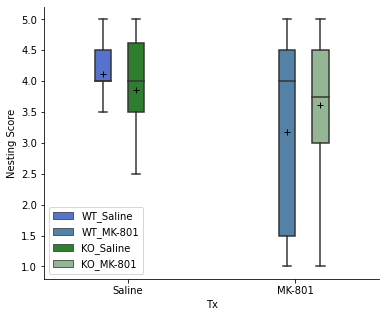

In [426]:
nest_05_fig = plt.figure(figsize= (6, 5))
ax = plt.subplot()
sns.boxplot(data= nest_WK, x='Tx', y='Nesting Score', hue='Group', hue_order = ['WT_Saline_1.0', 'WT_MK-801_0.5', 'KO_Saline_1.0', 'KO_MK-801_0.5'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.despine()
new_labels = ['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801']
[h, l] = ax.get_legend_handles_labels()
plt.legend(ncol = 1, loc = 3, handles = h, labels = new_labels)

In [427]:
nest_05_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/nesting05_box.svg')

#### No overall effect

In [406]:
pg.kruskal(data = nest_WK, dv = 'Nesting Score', between = '')

Source  ddof1         H     p-unc
Kruskal  Group      3  4.040932  0.257078

In [482]:
nest_multi05 = {'Group A': ['WT_Saline_1.0', 'WT_Saline_1.0', 'WT_Saline_1.0', 'KO_Saline_1.0', 'KO_Saline_1.0', 'WT_MK-801_0.5'], 'Group B': ['KO_Saline_1.0', 'WT_MK-801_0.5', 'KO_MK-801_0.5', 'WT_MK-801_0.5', 'KO_MK-801_0.5', 'KO_MK-801_0.5'], 'MWU-U' : [], 'MWU-p' : []}

In [483]:
for ii in range(0, 6):
    group_A = nest_WK[nest_WK['Group'] == nest_multi05['Group A'][ii]]['Nesting Score']
    group_B = nest_WK[nest_WK['Group'] == nest_multi05['Group B'][ii]]['Nesting Score']
    mwu_p = pg.mwu(group_A, group_B, tail = 'one-sided')
    nest_multi05['MWU-U'].append(mwu_p['U-val'].values.item())
    nest_multi05['MWU-p'].append(mwu_p['p-val'].values.item())

In [484]:
nesting05_df = pd.DataFrame(nest_multi05)

In [485]:
nesting05_df

Group A        Group B  MWU-U     MWU-p
0  WT_Saline_1.0  KO_Saline_1.0  419.0  0.380447
1  WT_Saline_1.0  WT_MK-801_0.5  312.0  0.035772
2  WT_Saline_1.0  KO_MK-801_0.5  326.0  0.135999
3  KO_Saline_1.0  WT_MK-801_0.5  384.5  0.056714
4  KO_Saline_1.0  KO_MK-801_0.5  389.5  0.254074
5  WT_MK-801_0.5  KO_MK-801_0.5  174.5  0.823015

#### Individual effect on WT mice (0.5mg/kg), not adjusted

## Burrowing

In [428]:
burr_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/Burrowing.csv')

In [429]:
burr_r.columns

Index(['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Initial weight',
       'Baseline(2h)', 'Baseline(12h)', 'Test(2h)', 'Test(12h)',
       'Baseline(2h%)', 'Baseline(12h%)', 'Test(2h%)', 'Test(12h%)',
       'Amount_Burrowed(g)'],
      dtype='object')

In [434]:
burr_r = burr_r[['Sub', 'Genotype', 'UR', 'Sex', 'Tx', 'Dose (mg/Kg)', 'Amount_Burrowed(g)']].copy()

In [435]:
burr_r['Tx'].unique()

array(['MK-801', 'Saline'], dtype=object)

In [436]:
burr_r['Group'] = burr_r['Genotype']+'_'+burr_r['Tx']+'_'+burr_r['Dose (mg/Kg)'].astype(str)

In [437]:
burr_r.groupby(['Genotype', 'Tx', 'Dose (mg/Kg)'])['Sub'].count()

Genotype  Tx      Dose (mg/Kg)
HE        MK-801  1.0              6
          Saline  1.0              6
KO        MK-801  0.5             21
                  1.0              3
          Saline  1.0             32
WT        MK-801  0.5             19
                  1.0             22
          Saline  1.0             23
Name: Sub, dtype: int64

#### Effect on WT mice 

Text(0, 3, '***')

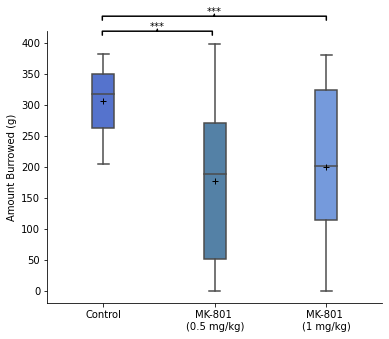

In [659]:
burr_wt = plt.figure(figsize = (6, 5))
ax = plt.subplot()
sns.boxplot(data=burr_r[burr_r['Genotype']=='WT'], x='Group', y='Amount_Burrowed(g)', hue='Group', order = ['WT_Saline_1.0', 'WT_MK-801_0.5', 'WT_MK-801_1.0'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.2, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = True, ax = ax, dodge = False)
sns.despine()
labels = ['Control', 'MK-801 \n(0.5 mg/kg)', 'MK-801 \n(1 mg/kg)']
ax.set_xticklabels(labels)
plt.xlabel('')
plt.ylabel('Amount Burrowed (g)')
plt.legend([], [], frameon = False)
plt.annotate(s='***', xy=(167, 285), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=11.2, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(110, 270), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)



In [660]:
burr_wt.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/burr_wt_box.svg')

In [444]:
# outlier detection
out = pg.madmedianrule(burr_r[burr_r['Group']=='WT_Saline_1.0']['Amount_Burrowed(g)'])
idx = burr_r[burr_r['Group']=='WT_Saline_1.0']['Amount_Burrowed(g)'].index.values
outs = idx[out]
outs

array([45, 48, 57])

In [445]:
burr_r.drop(index = outs, inplace = True)

#### Stats

In [449]:
pg.normality(data = burr_r[burr_r['Genotype']== 'WT'], dv = 'Amount_Burrowed(g)', group = 'Group')

W      pval  normal
WT_MK-801_1.0  0.918757  0.071647    True
WT_Saline_1.0  0.943267  0.276201    True
WT_MK-801_0.5  0.925837  0.145100    True

In [450]:
pg.homoscedasticity(data = burr_r[burr_r['Genotype']== 'WT'], dv = 'Amount_Burrowed(g)', group = 'Group')

W      pval  equal_var
levene  9.366687  0.000298      False

In [451]:
pg.welch_anova(data = burr_r[burr_r['Genotype']== 'WT'], dv = 'Amount_Burrowed(g)', between = 'Group')

Source  ddof1      ddof2          F     p-unc       np2
0  Group      2  32.278407  13.169093  0.000066  0.221408

In [905]:
pg.pairwise_gameshowell(data = burr_r[burr_r['Genotype']== 'WT'], dv = 'Amount_Burrowed(g)', between = 'Group', effsize = 'cohen')

A              B     mean(A)     mean(B)        diff  \
0  WT_MK-801_0.5  WT_MK-801_1.0  176.716316  200.161818  -23.445502   
1  WT_MK-801_0.5  WT_Saline_1.0  176.716316  307.286000 -130.569684   
2  WT_MK-801_1.0  WT_Saline_1.0  200.161818  307.286000 -107.124182   

          se       tail         T         df      pval     cohen  
0  28.163691  two-sided -0.588647  37.869354  0.808679 -0.184357  
1  22.340092  two-sided -4.132781  23.269212  0.001000 -1.323985  
2  20.577767  two-sided -3.681072  28.238265  0.001000 -1.137294

### All groups 0.5 mg/kg

In [461]:
burr_05 = burr_r[burr_r['Group'].isin(['WT_Saline_1.0', 'WT_MK-801_0.5', 'KO_Saline_1.0', 'KO_MK-801_0.5'])].copy()

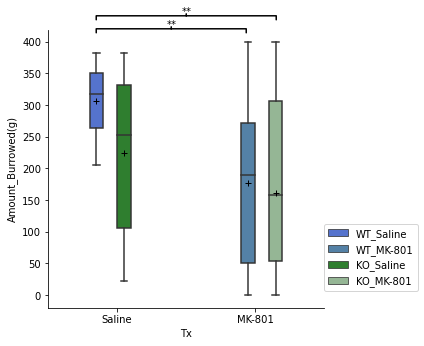

In [933]:
burr_05_fig = plt.figure(figsize= (6, 5))
ax = plt.subplot()
sns.boxplot(data= burr_05, x='Tx', y='Amount_Burrowed(g)', hue='Group', hue_order = ['WT_Saline_1.0', 'WT_MK-801_0.5', 'KO_Saline_1.0', 'KO_MK-801_0.5'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = True, dodge = True, ax = ax)
sns.despine()
new_labels = ['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801']
[h, l] = ax.get_legend_handles_labels()
plt.annotate(s='**', xy=(138, 290), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=9, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(123, 277), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=7.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.legend(bbox_to_anchor=(1, .3), loc=2, borderaxespad=0., handles = h, labels = new_labels)
plt.tight_layout()


In [934]:
burr_05_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/burr05_box.svg')

### Stats 0.5

In [470]:
pg.normality(data = burr_05, dv = 'Amount_Burrowed(g)', group = 'Group')

W      pval  normal
KO_Saline_1.0  0.898598  0.005706   False
WT_Saline_1.0  0.943267  0.276201    True
KO_MK-801_0.5  0.898930  0.033363   False
WT_MK-801_0.5  0.925837  0.145100    True

In [471]:
pg.kruskal(data = burr_05, dv = 'Amount_Burrowed(g)', between = 'Group')

Source  ddof1          H     p-unc
Kruskal  Group      3  16.568339  0.000867

In [486]:
bur_multi05 = {'Group A': ['WT_Saline_1.0', 'WT_Saline_1.0', 'WT_Saline_1.0', 'KO_Saline_1.0', 'KO_Saline_1.0', 'WT_MK-801_0.5'], 'Group B': ['KO_Saline_1.0', 'WT_MK-801_0.5', 'KO_MK-801_0.5', 'WT_MK-801_0.5', 'KO_MK-801_0.5', 'KO_MK-801_0.5'], 'MWU-U' : [], 'MWU-p' : []}

In [487]:
for ii in range(0, 6):
    group_A = burr_05[burr_05['Group'] == bur_multi05['Group A'][ii]]['Amount_Burrowed(g)']
    group_B = burr_05[burr_05['Group'] == bur_multi05['Group B'][ii]]['Amount_Burrowed(g)']
    mwu_p = pg.mwu(group_A, group_B, tail = 'one-sided')
    bur_multi05['MWU-U'].append(mwu_p['U-val'].values.item())
    bur_multi05['MWU-p'].append(mwu_p['p-val'].values.item())

In [488]:
burr_05_df = pd.DataFrame(bur_multi05)

In [489]:
burr_05_df

Group A        Group B  MWU-U     MWU-p
0  WT_Saline_1.0  KO_Saline_1.0  444.0  0.010092
1  WT_Saline_1.0  WT_MK-801_0.5  312.0  0.000320
2  WT_Saline_1.0  KO_MK-801_0.5  337.0  0.000484
3  KO_Saline_1.0  WT_MK-801_0.5  388.0  0.051894
4  KO_Saline_1.0  KO_MK-801_0.5  437.0  0.033804
5  WT_MK-801_0.5  KO_MK-801_0.5  217.0  0.322574

## Open Field

In [523]:
of_r = pd.read_csv('/Users/labc02/Documents/PDCB_data/MK-project/OF_Final.csv')

In [524]:
of_r['ID'] = of_r['SUBJECT TYPE']+'_'+of_r['SUBJECT FACTOR2']+'_'+of_r['SUBJECT ID'].astype(str)

In [525]:
of_r['Group'] = of_r['SUBJECT TYPE']+'_'+of_r['SUBJECT FACTOR1']

In [526]:
of_r.columns

Index(['SUBJECT ID', 'SUBJECT TYPE', 'SUBJECT SEX', 'SUBJECT FACTOR1',
       'SUBJECT FACTOR2', 'TOTAL DISTANCE (cm)', 'TOTAL DISTANCE X-AXIS (cm)',
       'TOTAL DISTANCE Y-AXIS (cm)', 'HORIZONTAL ACTIVITY COUNT',
       'AMBULATORY ACTIVITY COUNT', 'REST TIME (s)', 'REST EPISODE COUNT',
       'MOVEMENT TIME (s)', 'MOVEMENT EPISODE COUNT', 'AMBULATORY TIME (s)',
       'AMBULATORY EPISODE COUNT', 'STEREOTYPY TIME (s)',
       'STEREOTYPIC EPISODE COUNT', 'STEREOTYPIC ACTIVITY COUNT',
       'STEREOTYPIC EPISODE ACTIVITY COUNT', 'VERTICAL EPISODE COUNT',
       'VERTICAL ACTIVITY COUNT', 'VERTICAL MOVEMENT TIME (s)',
       'CLOCKWISE REVOLUTIONS', 'COUNTER-CLOCKWISE REVOLUTIONS',
       'AMBULATORY EPISODE AVERAGE VELOCITY (cm/s)',
       'AMBULATORY EPISODE PEAK AVERAGE VELOCITY (cm/s)',
       'AMBULATORY EPISODE MEDIAN VELOCITY (cm/s)',
       'LEFT-FRONT TIME LEGACY (s)', 'RIGHT-FRONT TIME LEGACY (s)',
       'LEFT-REAR TIME LEGACY (s)', 'RIGHT-REAR TIME LEGACY (s)',
       'MAR

In [527]:
of_r.head()

SUBJECT ID SUBJECT TYPE SUBJECT SEX SUBJECT FACTOR1 SUBJECT FACTOR2  \
0           1           WT      Female      MK 1 mg/kg          UR 1.1   
1           2           WT      Female      MK 1 mg/kg          UR 1.1   
2           3           WT      Female      MK 1 mg/kg          UR 1.1   
3           4           WT      Female          Saline          UR 1.1   
4           5           WT      Female          Saline          UR 1.1   

   TOTAL DISTANCE (cm)  TOTAL DISTANCE X-AXIS (cm)  \
0              873.915                     240.030   
1              989.484                     175.578   
2             1029.658                     231.775   
3             1769.765                     473.710   
4             1019.153                     191.770   

   TOTAL DISTANCE Y-AXIS (cm)  HORIZONTAL ACTIVITY COUNT  \
0                     281.305                        940   
1                     301.308                       1345   
2                     254.318                       1523   
3                     461.010                       2340   
4                     282.258                       1222   

   AMBULATORY ACTIVITY COUNT  ...  LEFT-REAR TIME LEGACY (s)  \
0                        887  ...                     86.878   
1                       1303  ...                     42.648   
2                       1452  ...                     35.676   
3                       2300  ...                     32.809   
4                       1170  ...                     50.528   

   RIGHT-REAR TIME LEGACY (s)  MARGIN TIME LEGACY (s)  CENTER TIME LEGACY (s)  \
0                      23.181                 291.374                   8.626   
1                      23.277                 254.478                  45.522   
2                      11.576                 268.988                  31.012   
3                      41.947                 266.666                  33.334   
4                      26.395                 287.864                  12.136   

   MARGIN DISTANCE LEGACY (cm)  CENTER DISTANCE LEGACY (cm)  \
0                      776.021                       97.894   
1                      786.328                      203.156   
2                      834.239                      195.419   
3                     1337.059                      432.706   
4                      798.949                      220.204   

   MARGIN DISTANCE (%)  CENTER DISTANCE (%)           ID          Group  
0            88.798224            11.201776  WT_UR 1.1_1  WT_MK 1 mg/kg  
1            79.468491            20.531509  WT_UR 1.1_2  WT_MK 1 mg/kg  
2            81.020980            18.979020  WT_UR 1.1_3  WT_MK 1 mg/kg  
3            75.550087            24.449913  WT_UR 1.1_4      WT_Saline  
4            78.393431            21.606569  WT_UR 1.1_5      WT_Saline  

[5 rows x 40 columns]

In [563]:
of_r.groupby(['SUBJECT TYPE', 'SUBJECT FACTOR1'])['ID'].count()

SUBJECT TYPE  SUBJECT FACTOR1
HE            MK 1 mg/kg          5
              Saline              4
KO            MK 0.5 mg/kg       30
              MK 1 mg/kg          3
              Saline             46
WT            MK 0.5 mg/kg       20
              MK 1 mg/kg         20
              Saline             36
Name: ID, dtype: int64

In [528]:
col_oi = ['TOTAL DISTANCE (cm)', 'REST TIME (s)', 'REST EPISODE COUNT', 'MOVEMENT EPISODE COUNT', 'AMBULATORY TIME (s)', 'STEREOTYPY TIME (s)', 'STEREOTYPIC EPISODE COUNT', 'VERTICAL EPISODE COUNT', 'VERTICAL MOVEMENT TIME (s)', 'CLOCKWISE REVOLUTIONS', 'COUNTER-CLOCKWISE REVOLUTIONS', 'AMBULATORY EPISODE AVERAGE VELOCITY (cm/s)', 'AMBULATORY EPISODE PEAK AVERAGE VELOCITY (cm/s)', 'MARGIN TIME LEGACY (s)', 'CENTER TIME LEGACY (s)']


In [529]:
len(col_oi)

15

In [535]:
axs.shape

(3, 5)

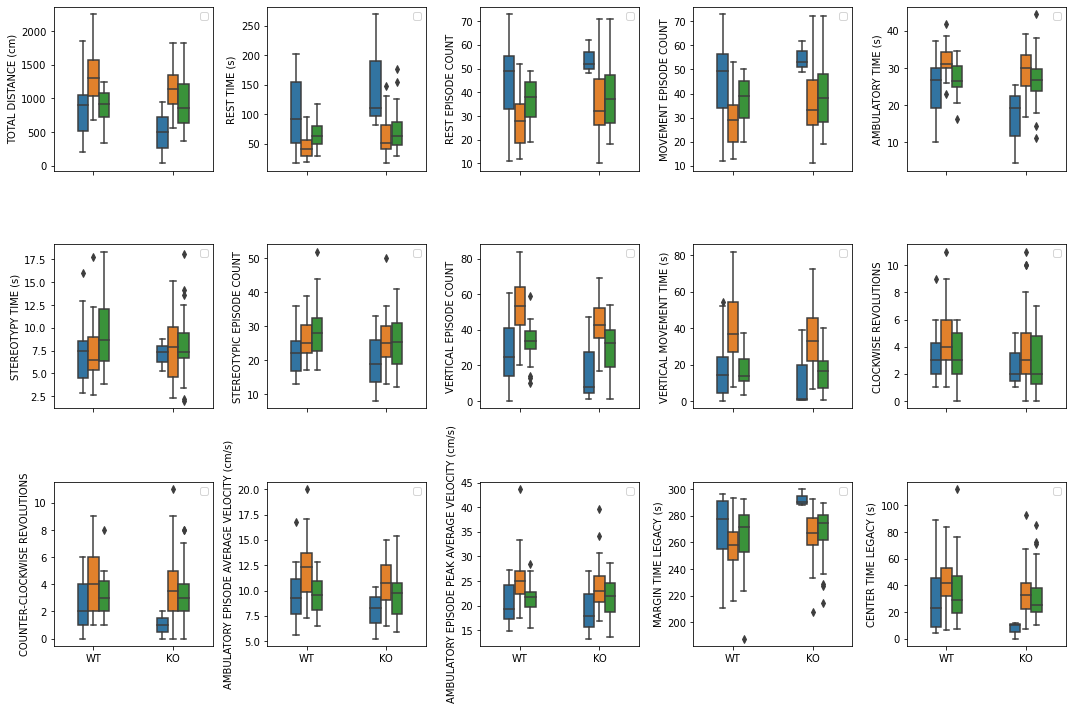

In [557]:
exp_fig, axs = plt.subplots(nrows = 3, ncols = 5, sharex = True, figsize = (15, 10))
ii = 0
for jj in range(3):
    for kk in range(5):
        sns.boxplot(data = of_r[of_r['SUBJECT TYPE']!= 'HE'], x = 'SUBJECT TYPE', y = col_oi[ii], hue = 'SUBJECT FACTOR1', width = 0.4, ax = axs[jj, kk], dodge = True)
        axs[jj, kk].legend([])
        axs[jj, kk].set_xlabel('')
        ii +=1
plt.tight_layout()


In [558]:
cols_selection = ['TOTAL DISTANCE (cm)', 'REST TIME (s)', 'VERTICAL EPISODE COUNT', 'VERTICAL MOVEMENT TIME (s)', 'AMBULATORY EPISODE AVERAGE VELOCITY (cm/s)', 'AMBULATORY EPISODE PEAK AVERAGE VELOCITY (cm/s)', 'CENTER TIME LEGACY (s)']


#### Laterality

(-0.55, 11.55, -0.55, 11.55)

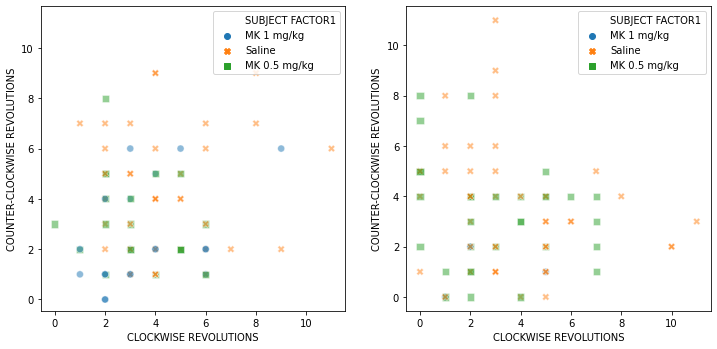

In [614]:
plt.figure(figsize = (12,6))
ax1 = plt.subplot(121)
sns.scatterplot(data = of_r[of_r['SUBJECT TYPE']== 'WT'], x = 'CLOCKWISE REVOLUTIONS', y = 'COUNTER-CLOCKWISE REVOLUTIONS', hue = 'SUBJECT FACTOR1', style = 'SUBJECT FACTOR1', alpha = 0.5, ax = ax1, s = 50)
plt.axis('square')
#new_labels = ['Saline', 'MK-1.0 mg', 'MK-0.5 mg']
#[h, l] = ax1.get_legend_handles_labels()
#ax1.legend(ncol = 3, loc = 2, handles = h, labels = new_labels)

ax2 = plt.subplot(122)
sns.scatterplot(data = of_r[of_r['SUBJECT TYPE']== 'KO'], x = 'CLOCKWISE REVOLUTIONS', y = 'COUNTER-CLOCKWISE REVOLUTIONS', hue = 'SUBJECT FACTOR1', style = 'SUBJECT FACTOR1', alpha = 0.5, ax = ax2, s = 50)
plt.axis('square')
#new_labels = ['Saline', 'MK-1.0 mg', 'MK-0.5 mg']
#[h, l] = ax2.get_legend_handles_labels()
#ax2.legend(ncol = 3, loc = 2, handles = h, labels = new_labels)


In [623]:
of_r['Laterality'] = (of_r['CLOCKWISE REVOLUTIONS']-of_r['COUNTER-CLOCKWISE REVOLUTIONS']).abs() /(of_r['CLOCKWISE REVOLUTIONS']+of_r['COUNTER-CLOCKWISE REVOLUTIONS'])

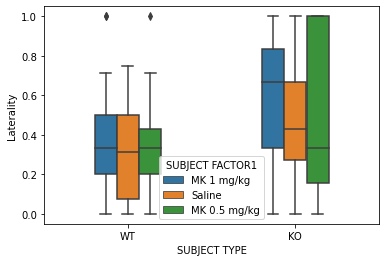

In [624]:
sns.boxplot(data = of_r[of_r['SUBJECT TYPE']!= 'HE'], x = 'SUBJECT TYPE', y = 'Laterality', hue = 'SUBJECT FACTOR1', width = 0.4, dodge = True)

### Total Distance

In [628]:
pg.normality(data = of_r[of_r['Group']!= 'KO_MK 1 mg/kg'], dv = 'TOTAL DISTANCE (cm)', group = 'Group')

W      pval  normal
WT_MK 1 mg/kg    0.959615  0.536178    True
WT_Saline        0.977967  0.676399    True
KO_Saline        0.977157  0.494708    True
KO_MK 0.5 mg/kg  0.958903  0.290331    True
WT_MK 0.5 mg/kg  0.958370  0.511829    True
HE_MK 1 mg/kg    0.958214  0.795493    True
HE_Saline        0.844049  0.207469    True

In [629]:
of_wt = of_r[of_r['SUBJECT TYPE'] == 'WT'].copy()

In [631]:
pg.homoscedasticity(data = of_wt, dv = 'TOTAL DISTANCE (cm)', group = 'SUBJECT FACTOR1')

W      pval  equal_var
levene  2.088385  0.131227       True

In [632]:
pg.anova(data = of_wt, dv = 'TOTAL DISTANCE (cm)', between = 'SUBJECT FACTOR1')

Source  ddof1  ddof2          F    p-unc       np2
0  SUBJECT FACTOR1      2     73  13.509705  0.00001  0.270142

In [633]:
pg.pairwise_tukey(data = of_wt, dv = 'SUBJECT FACTOR1', between = 'SUBJECT FACTOR1')

A           B    mean(A)      mean(B)        diff          se  \
0  MK 0.5 mg/kg  MK 1 mg/kg  878.91130   855.568650   23.342650  115.325429   
1  MK 0.5 mg/kg      Saline  878.91130  1302.410083 -423.498783  101.707468   
2    MK 1 mg/kg      Saline  855.56865  1302.410083 -446.841433  101.707468   

        tail         T  p-tukey    hedges  
0  two-sided  0.202407    0.900  0.062735  
1  two-sided -4.163891    0.001 -1.145050  
2  two-sided -4.393398    0.001 -1.208164

Text(0, 3, '***')

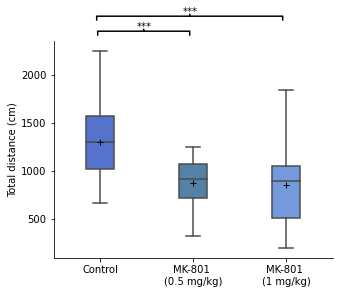

In [658]:
dist_wt = plt.figure(figsize = (5, 4))
ax = plt.subplot()
sns.boxplot(data= of_wt, x='SUBJECT FACTOR1', y='TOTAL DISTANCE (cm)', hue='Group', order = ['Saline', 'MK 0.5 mg/kg', 'MK 1 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = True, ax = ax, dodge = False)
sns.despine()
labels = ['Control', 'MK-801 \n(0.5 mg/kg)', 'MK-801 \n(1 mg/kg)']
ax.set_xticklabels(labels)
plt.xlabel('')
plt.ylabel('Total distance (cm)')
plt.legend([], [], frameon = False)
plt.annotate(s='***', xy=(136, 240), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=9.3, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(90, 225), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.6, lengthB=.4', lw=1.5, color='k'), fontsize = 10)



In [662]:
dist_wt.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_wt_dist_box.svg')

In [663]:
of_all = of_r[of_r['Group'].isin(['WT_Saline', 'KO_Saline', 'WT_MK 0.5 mg/kg', 'KO_MK 0.5 mg/kg'])].copy()

In [664]:
of_all['Group'].unique()

array(['WT_Saline', 'KO_Saline', 'KO_MK 0.5 mg/kg', 'WT_MK 0.5 mg/kg'],
      dtype=object)

In [665]:
pg.homoscedasticity(data = of_all, dv = 'TOTAL DISTANCE (cm)', group = 'Group')

W     pval  equal_var
levene  1.188846  0.31671       True

In [672]:
col_names = {'TOTAL DISTANCE (cm)' : 'distance', 'SUBJECT TYPE': 'Genotype', 'SUBJECT FACTOR1': 'Tx'}
of_all.rename(columns = col_names, inplace = True)

In [673]:
pg.anova(data = of_all, dv = 'distance', between = ['Genotype', 'Tx'])

Source            SS     DF            MS          F     p-unc  \
0       Genotype  3.018859e+05    1.0  3.018859e+05   2.626639  0.107545   
1             Tx  2.551342e+06    1.0  2.551342e+06  22.198628  0.000006   
2  Genotype * Tx  4.102994e+05    1.0  4.102994e+05   3.569919  0.061097   
3       Residual  1.471135e+07  128.0  1.149324e+05        NaN       NaN   

        np2  
0  0.020108  
1  0.147795  
2  0.027133  
3       NaN

In [674]:
pg.pairwise_tukey(data = of_all, dv = 'distance', between = 'Group')

A                B      mean(A)      mean(B)        diff  \
0  KO_MK 0.5 mg/kg        KO_Saline   928.527167  1118.555674 -190.028507   
1  KO_MK 0.5 mg/kg  WT_MK 0.5 mg/kg   928.527167   878.911300   49.615867   
2  KO_MK 0.5 mg/kg        WT_Saline   928.527167  1302.410083 -373.882917   
3        KO_Saline  WT_MK 0.5 mg/kg  1118.555674   878.911300  239.644374   
4        KO_Saline        WT_Saline  1118.555674  1302.410083 -183.854409   
5  WT_MK 0.5 mg/kg        WT_Saline   878.911300  1302.410083 -423.498783   

          se       tail         T   p-tukey    hedges  
0  79.558849  two-sided -2.388528  0.080903 -0.554828  
1  97.865725  two-sided  0.506979  0.900000  0.144054  
2  83.807200  two-sided -4.461227  0.001000 -1.089870  
3  90.802811  two-sided  2.639174  0.042572  0.698564  
4  75.439361  two-sided -2.437115  0.071846 -0.537216  
5  94.547273  two-sided -4.479228  0.001000 -1.231766

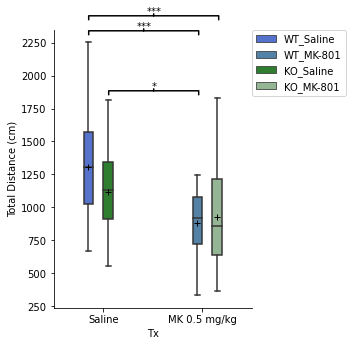

In [941]:
of_all_dist_fig = plt.figure(figsize= (5, 5))
ax = plt.subplot()
sns.boxplot(data= of_all, x='Tx', y='distance', hue='Group', hue_order = ['WT_Saline', 'WT_MK 0.5 mg/kg', 'KO_Saline', 'KO_MK 0.5 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = True, dodge = True)
sns.despine()
new_labels = ['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801']
[h, l] = ax.get_legend_handles_labels()
plt.ylabel('Total Distance (cm)')
plt.annotate(s='***', xy=(100, 290), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(90, 275), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(100, 215), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0., handles = h, labels = new_labels)
plt.tight_layout()

In [942]:
of_all_dist_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_all_dist_box.svg')

#### Rest

In [712]:
pg.normality(data = of_r[of_r['Group']!= 'KO_MK 1 mg/kg'], dv = 'REST TIME (s)', group = 'Group')

W      pval  normal
WT_MK 1 mg/kg    0.913977  0.075919    True
WT_Saline        0.936718  0.040189   False
KO_Saline        0.928949  0.007731   False
KO_MK 0.5 mg/kg  0.890515  0.004962   False
WT_MK 0.5 mg/kg  0.962744  0.599996    True
HE_MK 1 mg/kg    0.891519  0.364801    True
HE_Saline        0.915702  0.513126    True

In [713]:
pg.homoscedasticity(data = of_wt, dv = 'REST TIME (s)', group = 'SUBJECT FACTOR1')

W          pval  equal_var
levene  18.422012  3.333838e-07      False

In [714]:
pg.welch_anova(data = of_wt, dv = 'REST TIME (s)', between = 'SUBJECT FACTOR1')

Source  ddof1      ddof2          F     p-unc       np2
0  SUBJECT FACTOR1      2  33.904002  13.106025  0.000061  0.319968

In [716]:
pg.pairwise_gameshowell(data = of_wt, dv = 'REST TIME (s)', between = 'SUBJECT FACTOR1', effsize = 'cohen')

A           B   mean(A)     mean(B)       diff        se  \
0  MK 0.5 mg/kg  MK 1 mg/kg   65.5034  101.065000 -35.561600  9.952540   
1  MK 0.5 mg/kg      Saline   65.5034   44.028417  21.474983  4.327893   
2    MK 1 mg/kg      Saline  101.0650   44.028417  57.036583  9.547641   

        tail         T         df      pval     cohen  
0  two-sided -2.526576  24.761481  0.033645 -0.798973  
1  two-sided  3.508660  34.507647  0.001544  0.978519  
2  two-sided  4.224180  21.430462  0.001000  1.178068

Text(0, 3, '**')

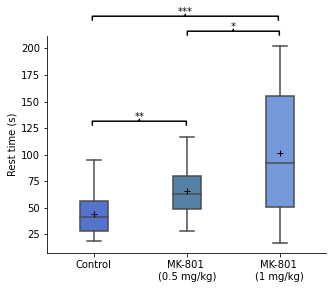

In [732]:
rest_wt = plt.figure(figsize = (5, 4))
ax = plt.subplot()
sns.boxplot(data= of_wt, x='SUBJECT FACTOR1', y='REST TIME (s)', hue='Group', order = ['Saline', 'MK 0.5 mg/kg', 'MK 1 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = True, ax = ax, dodge = False)
sns.despine()
labels = ['Control', 'MK-801 \n(0.5 mg/kg)', 'MK-801 \n(1 mg/kg)']
ax.set_xticklabels(labels)
plt.xlabel('')
plt.ylabel('Rest time (s)')
plt.legend([], [], frameon = False)
plt.annotate(s='***', xy=(138, 235), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=9.3, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(186, 220), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.6, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(92, 130), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=.4', lw=1.5, color='k'), fontsize = 10)



In [733]:
rest_wt.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_wt_rest_box.svg')

In [734]:
pg.homoscedasticity(data = of_all, dv = 'REST TIME (s)', group = 'Group')

W      pval  equal_var
levene  2.595555  0.055333       True

### Detect outliers

In [765]:
rest_outliers = []
# Saline group
out = pg.madmedianrule(of_all[of_all['Group']== 'KO_Saline']['REST TIME (s)'])
idx = of_all[of_all['Group']== 'KO_Saline']['REST TIME (s)'].index.values
for ii in idx[out]:
    rest_outliers.append(ii)

# 0.5 mg/kg group

out = pg.madmedianrule(of_all[of_all['Group']== 'KO_MK 0.5 mg/kg']['REST TIME (s)'])
idx = of_all[of_all['Group']== 'KO_MK 0.5 mg/kg']['REST TIME (s)'].index.values
for ii in idx[out]:
    rest_outliers.append(ii)

In [766]:
rest_outliers

[19, 143, 157, 137, 145]

In [767]:
tidy_rest = of_all.copy()

In [768]:
tidy_rest.drop(index = rest_outliers, inplace = True)

In [769]:
pg.normality(data = tidy_rest, dv = 'REST TIME (s)', group = 'Group')

W      pval  normal
WT_Saline        0.936718  0.040189   False
KO_Saline        0.943286  0.034050   False
KO_MK 0.5 mg/kg  0.921303  0.037361   False
WT_MK 0.5 mg/kg  0.962744  0.599996    True

In [770]:
pg.homoscedasticity(data = tidy_rest, dv = 'REST TIME (s)', group = 'Group')

W     pval  equal_var
levene  1.232118  0.30101       True

In [772]:
col_names = {'REST TIME (s)' : 'rest'}
tidy_rest.rename(columns = col_names, inplace = True)

KeyError: 'rest'

In [773]:
pg.anova(data = tidy_rest, dv = 'rest', between = ['Genotype', 'Tx'])

Source            SS     DF           MS          F     p-unc  \
0       Genotype   2220.885656    1.0  2220.885656   3.967992  0.048588   
1             Tx   5874.967722    1.0  5874.967722  10.496634  0.001538   
2  Genotype * Tx   1250.475645    1.0  1250.475645   2.234189  0.137549   
3       Residual  68843.117788  123.0   559.700145        NaN       NaN   

        np2  
0  0.031252  
1  0.078628  
2  0.017840  
3       NaN

In [775]:
pg.pairwise_tukey(data = tidy_rest, dv = 'rest', between = 'Group', effsize = 'cohen')

A                B    mean(A)    mean(B)       diff  \
0  KO_MK 0.5 mg/kg        KO_Saline  65.735500  57.337209   8.398291   
1  KO_MK 0.5 mg/kg  WT_MK 0.5 mg/kg  65.735500  65.503400   0.232100   
2  KO_MK 0.5 mg/kg        WT_Saline  65.735500  44.028417  21.707083   
3        KO_Saline  WT_MK 0.5 mg/kg  57.337209  65.503400  -8.166191   
4        KO_Saline        WT_Saline  57.337209  44.028417  13.308793   
5  WT_MK 0.5 mg/kg        WT_Saline  65.503400  44.028417  21.474983   

         se       tail         T   p-tukey     cohen  
0  5.745048  two-sided  1.461831  0.462017  0.354988  
1  6.926348  two-sided  0.033510  0.900000  0.009811  
2  5.961251  two-sided  3.641364  0.001676  0.917537  
3  6.403225  two-sided -1.275325  0.570863 -0.345177  
4  5.344484  two-sided  2.490192  0.062942  0.562550  
5  6.597896  two-sided  3.254823  0.006614  0.907727

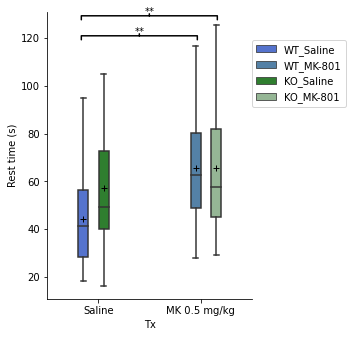

In [955]:
of_all_rest_fig = plt.figure(figsize= (5, 5))
ax = plt.subplot()
sns.boxplot(data= tidy_rest, x='Tx', y='rest', hue='Group', hue_order = ['WT_Saline', 'WT_MK 0.5 mg/kg', 'KO_Saline', 'KO_MK 0.5 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = True, dodge = True)
sns.despine()
new_labels = ['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801']
[h, l] = ax.get_legend_handles_labels()
plt.ylabel('Rest time (s)')
plt.annotate(s='**', xy=(102, 281), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.8, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(92, 261), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.legend(bbox_to_anchor=(1, .9), loc=2, borderaxespad=0, handles = h, labels = new_labels)
plt.tight_layout()

In [956]:
of_all_rest_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_all_rest_box.svg')

### Time in center

In [739]:
pg.normality(data = of_r[of_r['Group']!= 'KO_MK 1 mg/kg'], dv = 'CENTER TIME LEGACY (s)', group = 'Group')

W      pval  normal
WT_MK 1 mg/kg    0.883444  0.020416   False
WT_Saline        0.989265  0.975068    True
KO_Saline        0.943064  0.025504   False
KO_MK 0.5 mg/kg  0.871189  0.001781   False
WT_MK 0.5 mg/kg  0.873160  0.013358   False
HE_MK 1 mg/kg    0.977258  0.919446    True
HE_Saline        0.898073  0.421553    True

In [787]:
center_outliers = []
# Saline group
out = pg.madmedianrule(of_wt[of_wt['Group']== 'WT_MK 1 mg/kg']['CENTER TIME LEGACY (s)'])
idx = of_wt[of_wt['Group']== 'WT_MK 1 mg/kg']['CENTER TIME LEGACY (s)'].index.values
for ii in idx[out]:
    center_outliers.append(ii)
center_outliers

[141]

In [788]:
of_wt.drop(index = center_outliers, inplace = True)

In [789]:
pg.normality(data = of_wt, dv = 'CENTER TIME LEGACY (s)', group = 'Group')

W      pval  normal
WT_MK 1 mg/kg    0.894577  0.038854   False
WT_Saline        0.989265  0.975068    True
WT_MK 0.5 mg/kg  0.939826  0.287805    True

In [793]:
pg.homoscedasticity(data = of_wt, dv = 'CENTER TIME LEGACY (s)', group = 'Group')

W      pval  equal_var
levene  0.146001  0.864419       True

In [792]:
pg.anova(data = of_wt, dv = 'CENTER TIME LEGACY (s)', between = 'SUBJECT FACTOR1')

Source  ddof1  ddof2       F     p-unc       np2
0  SUBJECT FACTOR1      2     70  7.0512  0.001622  0.167681

In [795]:
pg.pairwise_tukey(data = of_wt, dv = 'CENTER TIME LEGACY (s)', between = 'SUBJECT FACTOR1', effsize = 'cohen')

A           B    mean(A)    mean(B)       diff        se  \
0  MK 0.5 mg/kg  MK 1 mg/kg  29.073056  25.296947   3.776108  5.848751   
1  MK 0.5 mg/kg      Saline  29.073056  42.533806 -13.460750  5.133159   
2    MK 1 mg/kg      Saline  25.296947  42.533806 -17.236858  5.042299   

        tail         T   p-tukey     cohen  
0  two-sided  0.645626  0.773675  0.212358  
1  two-sided -2.622313  0.024566 -0.756997  
2  two-sided -3.418452  0.001967 -0.969355

Text(0, 3, '*')

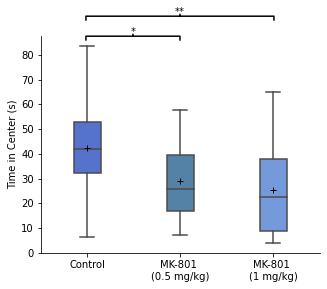

In [957]:
center_wt = plt.figure(figsize = (5, 4))
ax = plt.subplot()
sns.boxplot(data= of_wt, x='SUBJECT FACTOR1', y='CENTER TIME LEGACY (s)', hue='Group', order = ['Saline', 'MK 0.5 mg/kg', 'MK 1 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = True, ax = ax, dodge = False)
sns.despine()
labels = ['Control', 'MK-801 \n(0.5 mg/kg)', 'MK-801 \n(1 mg/kg)']
ax.set_xticklabels(labels)
plt.xlabel('')
plt.ylabel('Time in Center (s)')
plt.legend([], [], frameon = False)
plt.annotate(s='**', xy=(139, 235), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=9.4, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(92, 215), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=.4', lw=1.5, color='k'), fontsize = 10)



In [958]:
center_wt.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_wt_center_box.svg')

In [808]:
center_outliers = []
# all groups in loop 
for group in of_all['Group'].unique():
    
    out = pg.madmedianrule(of_all[of_all['Group']== group]['CENTER TIME LEGACY (s)'])
    idx = of_all[of_all['Group']== group]['CENTER TIME LEGACY (s)'].index.values
    
    for ii in idx[out]:
        center_outliers.append(ii)
center_outliers

[131, 132, 104, 129, 134, 144, 34, 155]

In [809]:
center_tidy = of_all.copy()

In [811]:
center_tidy.drop(index = center_outliers, inplace = True)

In [812]:
pg.normality(data = center_tidy, dv = 'CENTER TIME LEGACY (s)', group = 'Group')

W      pval  normal
WT_Saline        0.979123  0.730424    True
KO_Saline        0.970569  0.303626    True
KO_MK 0.5 mg/kg  0.942249  0.151984    True
WT_MK 0.5 mg/kg  0.939826  0.287805    True

In [813]:
pg.homoscedasticity(data = center_tidy, dv = 'CENTER TIME LEGACY (s)', group = 'Group')

W      pval  equal_var
levene  1.33844  0.265163       True

In [814]:
col_names = {'CENTER TIME LEGACY (s)' : 'center'}
center_tidy.rename(columns = col_names, inplace = True)

In [815]:
pg.anova(data = center_tidy, dv = 'center', between = ['Genotype', 'Tx'])

Source            SS     DF           MS          F     p-unc  \
0       Genotype   1457.222355    1.0  1457.222355   6.417923  0.012587   
1             Tx   2302.159061    1.0  2302.159061  10.139207  0.001849   
2  Genotype * Tx    219.205971    1.0   219.205971   0.965431  0.327799   
3       Residual  27246.616628  120.0   227.055139        NaN       NaN   

        np2  
0  0.050768  
1  0.077910  
2  0.007981  
3       NaN

In [832]:
pg.pairwise_tukey(data = center_tidy, dv = 'center', between = 'Group', effsize = 'cohen')

A                B    mean(A)    mean(B)       diff  \
0  KO_MK 0.5 mg/kg        KO_Saline  25.798769  32.446644  -6.647875   
1  KO_MK 0.5 mg/kg  WT_MK 0.5 mg/kg  25.798769  29.073056  -3.274286   
2  KO_MK 0.5 mg/kg        WT_Saline  25.798769  41.355057 -15.556288   
3        KO_Saline  WT_MK 0.5 mg/kg  32.446644  29.073056   3.373589   
4        KO_Saline        WT_Saline  32.446644  41.355057  -8.908413   
5  WT_MK 0.5 mg/kg        WT_Saline  29.073056  41.355057 -12.282002   

         se       tail         T   p-tukey     cohen  
0  3.711948  two-sided -1.790940  0.279039 -0.441181  
1  4.620288  two-sided -0.708676  0.886672 -0.217296  
2  3.901305  two-sided -3.987458  0.001000 -1.032382  
3  4.202362  two-sided  0.802784  0.833912  0.223886  
4  3.396021  two-sided -2.623191  0.044519 -0.591200  
5  4.370522  two-sided -2.810191  0.026470 -0.815086

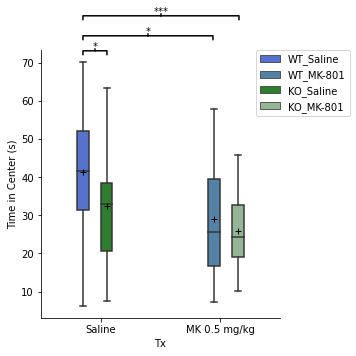

In [992]:
of_all_center_fig = plt.figure(figsize= (5, 5))
ax = plt.subplot()
sns.boxplot(data= center_tidy, x='Tx', y='center', hue='Group', hue_order = ['WT_Saline', 'WT_MK 0.5 mg/kg', 'KO_Saline', 'KO_MK 0.5 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.despine()
new_labels = ['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801']
[h, l] = ax.get_legend_handles_labels()
plt.ylabel('Time in Center (s)')
plt.annotate(s='***', xy=(120, 300), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=7.8, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(107, 280), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.5, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(54, 265), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.legend(bbox_to_anchor=(.9, 1), loc=2, borderaxespad=0, handles = h, labels = new_labels)
plt.tight_layout()

In [993]:
of_all_center_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_all_center_box.svg')

### Rearing

In [858]:
rearing_outliers = []
# all groups in loop 
for group in of_wt['Group'].unique():
    
    out = pg.madmedianrule(of_wt[of_wt['Group']== group]['VERTICAL EPISODE COUNT'])
    idx = of_wt[of_wt['Group']== group]['VERTICAL EPISODE COUNT'].index.values
    
    for ii in idx[out]:
        rearing_outliers.append(ii)
rearing_outliers

[32, 102]

In [859]:
rearing_wt = of_wt.copy()

In [860]:
rearing_wt.drop(rearing_outliers, inplace = True)

In [861]:
pg.normality(data = rearing_wt, dv = 'VERTICAL EPISODE COUNT', group = 'Group')

W      pval  normal
WT_MK 1 mg/kg    0.943112  0.299787    True
WT_Saline        0.969431  0.410190    True
WT_MK 0.5 mg/kg  0.932315  0.265215    True

In [862]:
pg.homoscedasticity(data = rearing_wt, dv = 'VERTICAL EPISODE COUNT', group = 'Group')

W      pval  equal_var
levene  2.838686  0.065455       True

In [863]:
pg.anova(data = rearing_wt, dv = 'VERTICAL EPISODE COUNT', between = 'Group')

Source  ddof1  ddof2          F         p-unc       np2
0  Group      2     68  17.216623  8.918896e-07  0.336153

In [864]:
pg.pairwise_tukey(data = rearing_wt, dv = 'VERTICAL EPISODE COUNT', between = 'Group', effsize = 'cohen')

A              B    mean(A)    mean(B)       diff        se  \
0  WT_MK 0.5 mg/kg  WT_MK 1 mg/kg  32.125000  28.157895   3.967105  5.301024   
1  WT_MK 0.5 mg/kg      WT_Saline  32.125000  51.555556 -19.430556  4.694106   
2    WT_MK 1 mg/kg      WT_Saline  28.157895  51.555556 -23.397661  4.430123   

        tail         T   p-tukey     cohen  
0  two-sided  0.748366  0.714969  0.253928  
1  two-sided -4.139351  0.001000 -1.243720  
2  two-sided -5.281492  0.001000 -1.497649

Text(0, 3, '***')

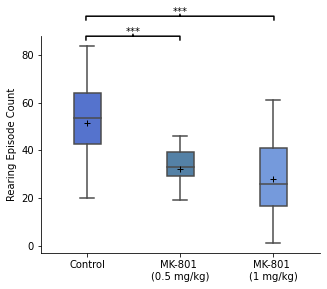

In [994]:
rear_wt_fig = plt.figure(figsize = (5, 4))
ax = plt.subplot()
sns.boxplot(data= rearing_wt, x='SUBJECT FACTOR1', y='VERTICAL EPISODE COUNT', hue='Group', order = ['Saline', 'MK 0.5 mg/kg', 'MK 1 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.3, palette=['cornflowerblue', 'royalblue', 'steelblue'], showfliers = False, ax = ax, dodge = False)
sns.despine()
labels = ['Control', 'MK-801 \n(0.5 mg/kg)', 'MK-801 \n(1 mg/kg)']
ax.set_xticklabels(labels)
plt.xlabel('')
plt.ylabel('Rearing Episode Count')
plt.legend([], [], frameon = False)
plt.annotate(s='***', xy=(139, 235), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=9.4, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(92, 215), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=.4', lw=1.5, color='k'), fontsize = 10)



In [995]:
rear_wt_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_wt_rear_box.svg')

In [869]:
rearing_outliers = []
# all groups in loop 
for group in of_all['Group'].unique():
    
    out = pg.madmedianrule(of_all[of_all['Group']== group]['CENTER TIME LEGACY (s)'])
    idx = of_all[of_all['Group']== group]['CENTER TIME LEGACY (s)'].index.values
    
    for ii in idx[out]:
        rearing_outliers.append(ii)
rearing_outliers

[131, 132, 104, 129, 134, 144, 34, 155]

In [870]:
rearing_tidy = of_all.copy()

In [871]:
rearing_tidy.drop(index = rearing_outliers, inplace = True)

In [872]:
pg.normality(data = rearing_tidy, dv = 'VERTICAL EPISODE COUNT', group = 'Group')

W      pval  normal
WT_Saline        0.968927  0.414468    True
KO_Saline        0.973084  0.372698    True
KO_MK 0.5 mg/kg  0.956984  0.335668    True
WT_MK 0.5 mg/kg  0.964912  0.698402    True

In [873]:
pg.homoscedasticity(data = rearing_tidy, dv = 'VERTICAL EPISODE COUNT', group = 'Group')

W      pval  equal_var
levene  0.372991  0.772632       True

In [874]:
col_names = {'VERTICAL EPISODE COUNT' : 'rearing'}
rearing_tidy.rename(columns = col_names, inplace = True)

In [875]:
pg.anova(data = rearing_tidy, dv = 'rearing', between = ['Genotype', 'Tx'])

Source            SS     DF           MS          F         p-unc  \
0       Genotype   1002.076413    1.0  1002.076413   5.008490  2.706817e-02   
1             Tx   7020.511901    1.0  7020.511901  35.089307  3.080917e-08   
2  Genotype * Tx    345.218087    1.0   345.218087   1.725439  1.915004e-01   
3       Residual  24009.064591  120.0   200.075538        NaN           NaN   

        np2  
0  0.040065  
1  0.226252  
2  0.014175  
3       NaN

In [877]:
pg.pairwise_tukey(data = rearing_tidy, dv = 'rearing', between = 'Group', effsize = 'cohen')

A                B    mean(A)    mean(B)       diff  \
0  KO_MK 0.5 mg/kg        KO_Saline  31.230769  44.000000 -12.769231   
1  KO_MK 0.5 mg/kg  WT_MK 0.5 mg/kg  31.230769  32.388889  -1.158120   
2  KO_MK 0.5 mg/kg        WT_Saline  31.230769  52.228571 -20.997802   
3        KO_Saline  WT_MK 0.5 mg/kg  44.000000  32.388889  11.611111   
4        KO_Saline        WT_Saline  44.000000  52.228571  -8.228571   
5  WT_MK 0.5 mg/kg        WT_Saline  32.388889  52.228571 -19.839683   

         se       tail         T   p-tukey     cohen  
0  3.484442  two-sided -3.664641  0.001540 -0.902751  
1  4.337110  two-sided -0.267026  0.900000 -0.081876  
2  3.662193  two-sided -5.733669  0.001000 -1.484489  
3  3.944798  two-sided  2.943398  0.017862  0.820875  
4  3.187878  two-sided -2.581206  0.049753 -0.581738  
5  4.102652  two-sided -4.835819  0.001000 -1.402613

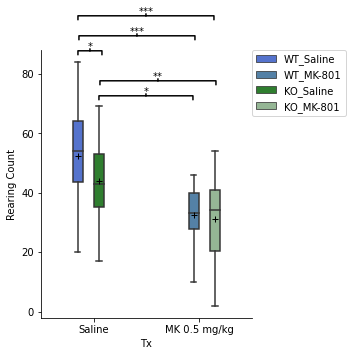

In [1030]:
of_all_rearing_fig = plt.figure(figsize= (5, 5))
ax = plt.subplot()
sns.boxplot(data= rearing_tidy, x='Tx', y='rearing', hue='Group', hue_order = ['WT_Saline', 'WT_MK 0.5 mg/kg', 'KO_Saline', 'KO_MK 0.5 mg/kg'], showmeans=True, meanprops={'marker':'+', 'markeredgecolor':'k'}, width=0.4, palette=['royalblue', 'steelblue', 'forestgreen', 'darkseagreen'], showfliers = False, dodge = True)
sns.despine()
new_labels = ['WT_Saline', 'WT_MK-801', 'KO_Saline', 'KO_MK-801']
[h, l] = ax.get_legend_handles_labels()
plt.ylabel('Rearing Count')
plt.annotate(s='***', xy=(105, 300), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=6.8, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='***', xy=(96, 280), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(49, 265), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=1.2, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='*', xy=(105, 220), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=4.7, lengthB=.4', lw=1.5, color='k'), fontsize = 10)
plt.annotate(s='**', xy=(117, 235), xycoords='axes points', xytext=(0, 3), textcoords='offset points', ha = 'center', arrowprops=dict(arrowstyle='-[, widthB=5.8, lengthB=.4', lw=1.5, color='k'), fontsize = 10)

plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0, handles = h, labels = new_labels)
plt.tight_layout()

In [1031]:
of_all_rearing_fig.savefig('/Users/labc02/Documents/PDCB_data/MK-project/Figures/of_all_rear_box.svg')